<a href="https://www.kaggle.com/code/purplecat07/wids-5-0?scriptVersionId=287105793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#steps to convert image dataset to dataframe
#can use pathlib to search for files
#Here's an example of how to recursively search the current directory for files
#Then, you just need to reformat that into a dataframe. Here's how to do that

import pandas as pd
from pathlib import Path

data = '../input/plantvillage-dataset/color'

paths = [path.parts[-2:] for path in
         Path(data).rglob('*.*')]                             #writing purpose ('*.*') so that all image formats can be retrieved
df = pd.DataFrame(data=paths, columns=['Class','Images'])     #create column names for dataframe
df = df.sort_values('Class',ascending=True)                   #sort class name
df.reset_index(drop=True, inplace=True)                       #sort index of each row
df

,Class,Images
0,Apple___Apple_scab,f0d56524-1296-4a54-bafa-9b620baf9f1d___FREC_Sc...
1,Apple___Apple_scab,6643566f-d980-4bdb-88d7-4d3ab3c771fa___FREC_Sc...
2,Apple___Apple_scab,0b1e31fa-cbc0-41ed-9139-c794e6855e82___FREC_Sc...
3,Apple___Apple_scab,1a21aabb-6f74-4644-8d9e-a517568b7e9c___FREC_Sc...
4,Apple___Apple_scab,258ce9eb-2b67-475b-b09c-0bc83b0987f1___FREC_Sc...
...,...,...
54300,Tomato___healthy,c0c7cd05-de91-47b6-9702-823e34e7d332___RS_HL 0...
54301,Tomato___healthy,e6782c6b-bf00-492d-a30e-966fd641b823___RS_HL 9...
54302,Tomato___healthy,e9392a5e-2fac-48c5-a23d-df3aa3f61048___GH_HL L...
54303,Tomato___healthy,1732045f-a451-4325-aa86-717a8cbdaf02___RS_HL 9...


In [2]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df.Images)))
print("Class Count : {} \n".format(len(df['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

Count the number of image datasets
Image Count : 54305
Class Count : 38 

Count the number of images in each class
Class
Orange___Haunglongbing_(Citrus_greening)              5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus                5357
Soybean___healthy                                     5090
Peach___Bacterial_spot                                2297
Tomato___Bacterial_spot                               2127
Tomato___Late_blight                                  1909
Squash___Powdery_mildew                               1835
Tomato___Septoria_leaf_spot                           1771
Tomato___Spider_mites Two-spotted_spider_mite         1676
Apple___healthy                                       1645
Tomato___healthy                                      1591
Blueberry___healthy                                   1502
Pepper,_bell___healthy                                1478
Tomato___Target_Spot                                  1404
Grape___Esca_(Black_Measles)                         

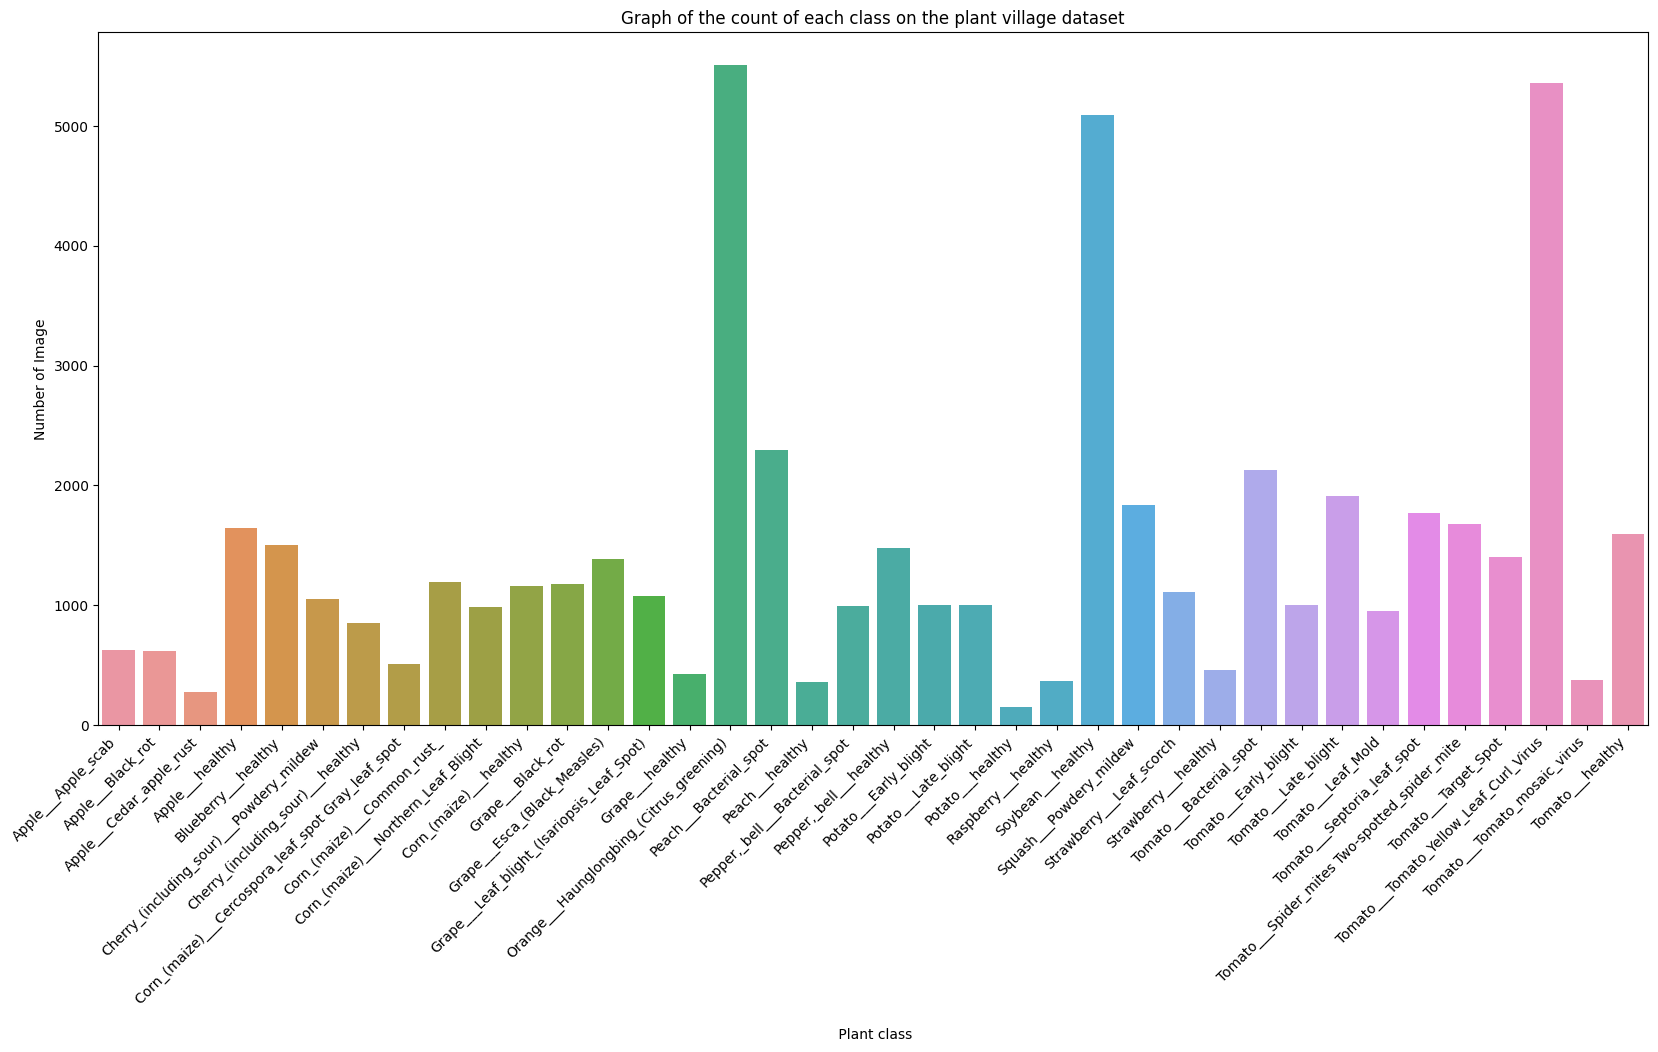

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(20,9))
sns.countplot(data=df, x='Class')
plt.title('Graph of the count of each class on the plant village dataset')
plt.xlabel('\n Plant class')
plt.ylabel('Number of Image')
plt.xticks(rotation=45, ha='right');

In [4]:
import plotly.express as px
Class_Id_Dist_Total = df['Class'].value_counts().reset_index()
Class_Id_Dist_Total.columns = ['Class', 'Count']

fig = px.pie(
    Class_Id_Dist_Total,
    values='Count',
    names='Class',
    hole=0.5
)
fig.update_layout(title='Distribution of Plant Village Dataset',font_size=15,title_x=0.45,title_y = 0.96,annotations=[dict(text='Plant Village Dataset',font_size=12, showarrow=False,height=1000,width=1000)])
fig.update_layout(height = 650, width = 1000)
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()